In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.losses import mean_squared_error
from keras_contrib.losses import DSSIMObjective

from keras import backend as K

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



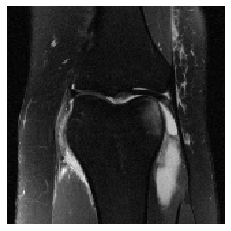

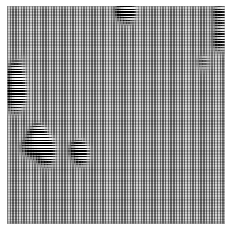

In [3]:
from dc_bigan_2 import BIGAN

encoder = load_model('bigan_2/Models/encoder_24.h5')
generator = load_model('bigan_2/Models/decoder_24.h5')

bigan = BIGAN()

train_generator = bigan.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, _ = next(train_generator)

    
z = encoder.predict(imgs)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

Instructions for updating:
ksizes is deprecated, use sizes instead



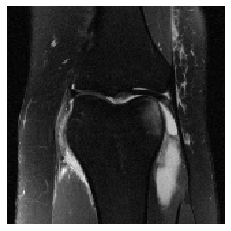

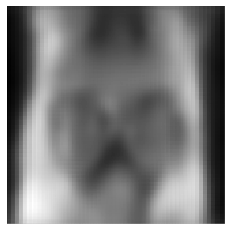

In [5]:
from dc_aae_2 import AdversarialAutoencoder

encoder = load_model('aae_huber_ssim_2/Models/encoder_aae_ssim_24.h5')
generator = load_model('aae_huber_ssim_2/Models/decoder_aae_ssim_24.h5')

aae = AdversarialAutoencoder()

train_generator = aae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, _ = next(train_generator)

    
z = encoder.predict(imgs)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

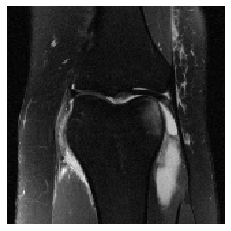

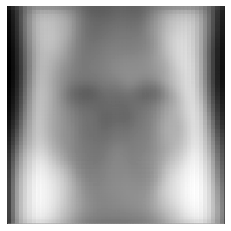

In [6]:
from dc_vae_2 import VariationalAutoencoder

encoder = load_model('vae_huber_ssim_2/Models/encoder_vae_24.h5')
generator = load_model('vae_huber_ssim_2/Models/decoder_vae_24.h5')

vae = VariationalAutoencoder()

train_generator = vae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, _ = next(train_generator)
    imgs = imgs[0]

    
params = encoder.predict(imgs)

mu = params[:, :vae.latent_dim]
log_var = params[:, vae.latent_dim:]

z = mu + (np.random.normal(0,1,mu.shape) * np.exp(.5 * log_var))
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

(16, 160, 160, 1)


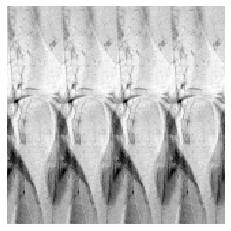

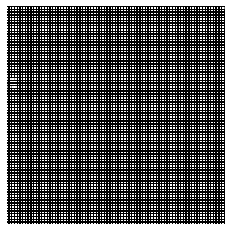

In [7]:
from dc_bigan_2 import BIGAN

encoder = load_model('bigan_2/Models/encoder_24.h5')
generator = load_model('bigan_2/Models/decoder_24.h5')

bigan = BIGAN()

train_generator = bigan.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, _ = next(train_generator)

kspace2 = np.fft.fft2(imgs)
kspace2 = np.fft.fftshift(kspace2, (1,2))
factor = 4

mask = np.zeros(imgs.shape)
print(mask.shape)
mask[:,:,::factor,:] = 1
kspace2 = mask * kspace2

kspace2 = np.fft.ifftshift(kspace2, (1,2))
under = np.fft.ifft2(kspace2)
under = np.absolute(under)
imgs = (under-np.min(under))/(np.max(under)-np.min(under))
    
z = encoder.predict(imgs)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
ksizes is deprecated, use sizes instead




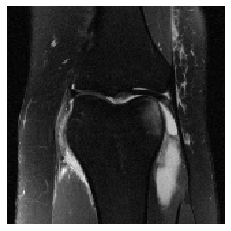

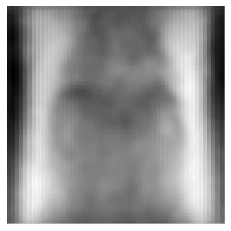

In [2]:
from dc_aae_3 import AdversarialAutoencoder

encoder = load_model('aae_huber_ssim_3/Models/encoder_aae_ssim_4.h5')
generator = load_model('aae_huber_ssim_3/Models/decoder_aae_ssim_4.h5')

aae = AdversarialAutoencoder()

train_generator = aae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, under, _ = next(train_generator)

z = encoder.predict(under)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
ksizes is deprecated, use sizes instead




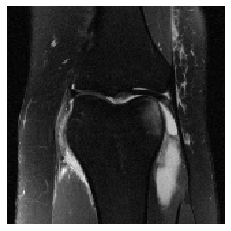

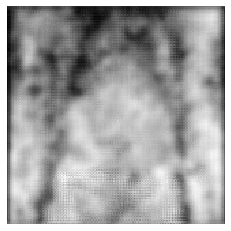

In [2]:
from dc_aae_3 import AdversarialAutoencoder

encoder = load_model('aae_huber_4/Models/encoder_aae_ssim_4.h5')
generator = load_model('aae_huber_4/Models/decoder_aae_ssim_4.h5')

aae = AdversarialAutoencoder()

train_generator = aae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, under, _ = next(train_generator)

z = encoder.predict(under)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



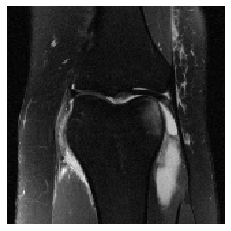

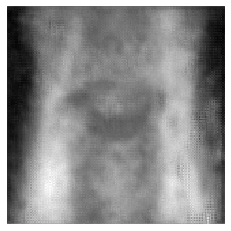

In [2]:
from dc_aae_3 import AdversarialAutoencoder

encoder = load_model('aae_mse_6/Models/encoder_aae_ssim_4.h5')
generator = load_model('aae_mse_6/Models/decoder_aae_ssim_4.h5')

aae = AdversarialAutoencoder()

train_generator = aae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, under, _ = next(train_generator)

z = encoder.predict(under)
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()

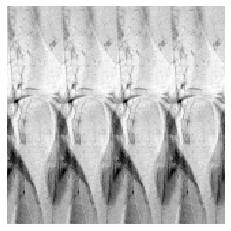

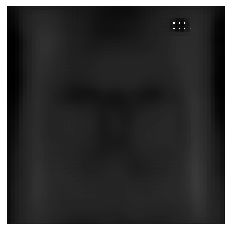

In [9]:
from dc_vae_2 import VariationalAutoencoder

encoder = load_model('vae_huber_ssim_2/Models/encoder_vae_24.h5')
generator = load_model('vae_huber_ssim_2/Models/decoder_vae_24.h5')

vae = VariationalAutoencoder()

train_generator = vae.generate_keras_input('train')#val')

mse = []
ssim = []

for i in range(100):
    imgs, _ = next(train_generator)
    imgs = imgs[0]

kspace2 = np.fft.fft2(imgs)
kspace2 = np.fft.fftshift(kspace2, (1,2))
factor = 4

mask = np.zeros(imgs.shape)
mask[:,:,::factor,:] = 1
kspace2 = mask * kspace2

kspace2 = np.fft.ifftshift(kspace2, (1,2))
under = np.fft.ifft2(kspace2)
under = np.absolute(under)
imgs = (under-np.min(under))/(np.max(under)-np.min(under))

params = encoder.predict(imgs)

mu = params[:, :vae.latent_dim]
log_var = params[:, vae.latent_dim:]

z = mu + (np.random.normal(0,1,mu.shape) * np.exp(.5 * log_var))
    
imgs_rec = generator.predict(z)

imgs = imgs[8,:,:,0]
imgs_rec = imgs_rec[8,:,:,0]

plt.imshow(imgs, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(imgs_rec, cmap='gray')
plt.axis('off')
plt.show()